In [417]:
import pandas as pd
import main_functions as functions
import importlib
import matplotlib.pyplot as plt

In [418]:
importlib.reload(functions)
fr_data = pd.read_csv('Data/Fertility rates.csv', skiprows=4)
dr_data = pd.read_csv('Data/Death rates.csv', skiprows=4)
covid_data = pd.read_csv('Data/WHO-COVID-19-global-data.csv')
polio_data = pd.read_csv('Data/the-number-of-reported-paralytic-polio-cases.csv')
hiv_data = pd.read_csv('Data/share-of-population-infected-with-hiv-ihme.csv')
iraq_death = pd.read_csv('Data/iraq-war-2003-2023.csv')
bt_death = pd.read_csv('Data/Battle-related-death.csv', skiprows=4)

Hypothesis one

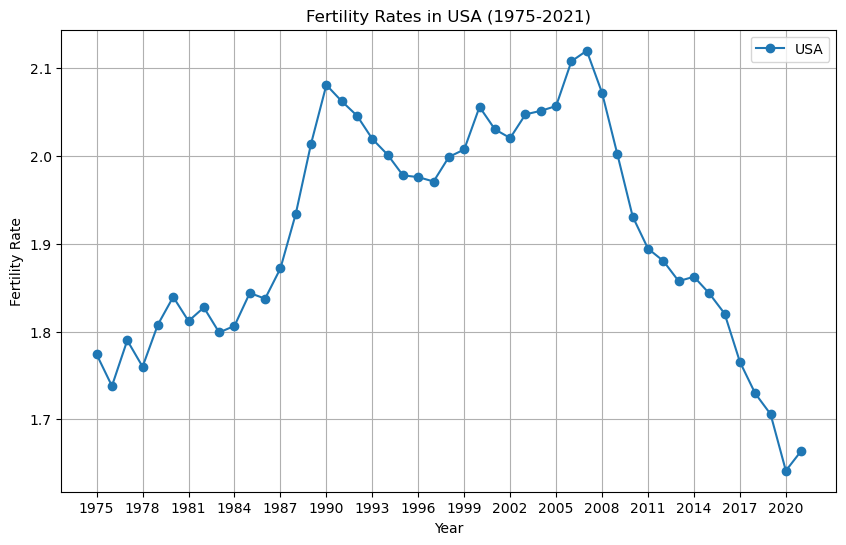

In [419]:
usa_fr = functions.ext_sel_da(fr_data, 'USA', 1975, 2021)
chn_fr = functions.ext_sel_da(fr_data, 'CHN', 1975, 2021)
functions.plot_fertility_rates(usa_fr, 'USA', 1975, 2021, 3)

China

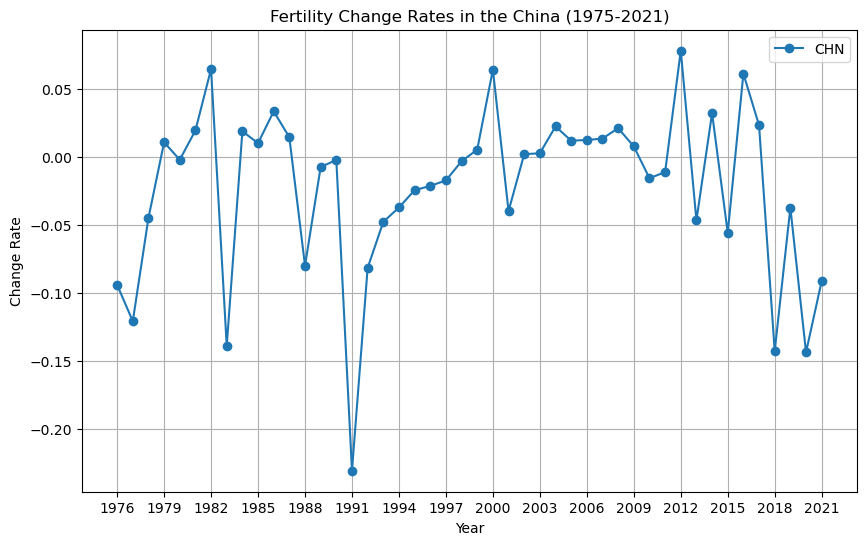

In [420]:
chn_fr_change_rates = functions.calculate_change_rate(chn_fr)
chn_cr_years = list(map(int, chn_fr_change_rates.keys()))
chn_change_rates = list(chn_fr_change_rates.values())
plt.figure(figsize=(10, 6))
plt.plot(chn_cr_years, chn_change_rates, label = 'CHN', marker='o')
plt.xticks(range(min(chn_cr_years), max(chn_cr_years) + 1, 3))
plt.title("Fertility Change Rates in the China (1975-2021)")
plt.xlabel("Year")
plt.ylabel("Change Rate")
plt.grid(True)
plt.legend()
plt.show()

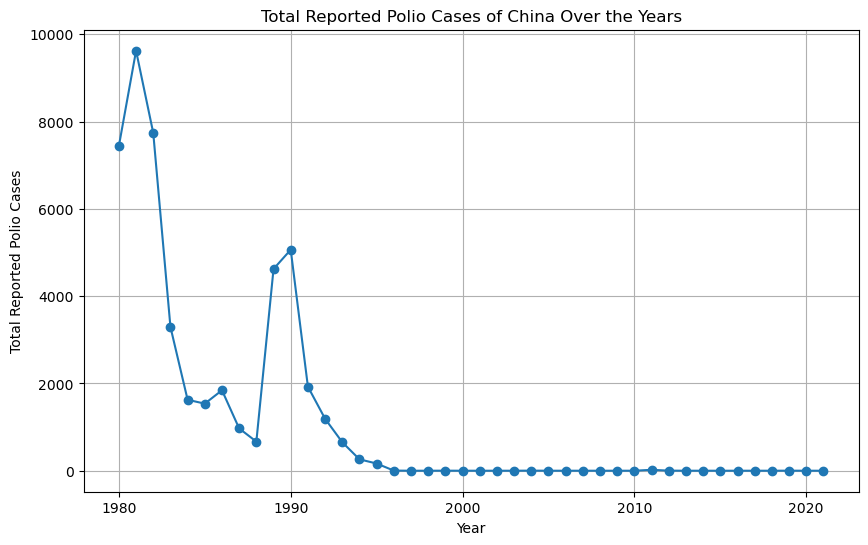

In [421]:
chn_polio = functions.ext_sel_polio(polio_data, 'CHN')
plt.figure(figsize=(10, 6))
plt.plot(chn_polio['Year'].values, chn_polio['Total (reported) polio cases'].values, marker='o')
plt.title('Total Reported Polio Cases of China Over the Years')
plt.xlabel('Year')
plt.ylabel('Total Reported Polio Cases')
plt.grid(True)
plt.show()

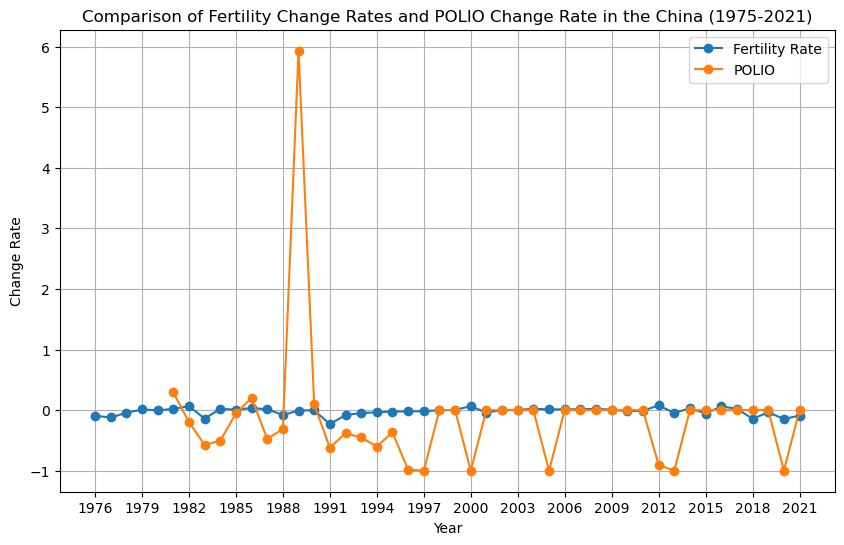

In [422]:
chn_polio_dict = chn_polio.set_index('Year')['Total (reported) polio cases'].to_dict()
chn_polio_change_rates = functions.calculate_change_rate(chn_polio_dict)
chn_polio_years = list(map(int, chn_polio_change_rates.keys()))
chn_polio_rates = list(chn_polio_change_rates.values())

plt.figure(figsize=(10, 6))
plt.plot(chn_cr_years, chn_change_rates, label = 'Fertility Rate', marker='o')
plt.plot(chn_polio_years, chn_polio_rates, label = 'POLIO', marker='o')
plt.xticks(range(min(chn_cr_years), max(chn_cr_years) + 1, 3))
plt.title("Comparison of Fertility Change Rates and POLIO Change Rate in the China (1975-2021)")
plt.xlabel("Year")
plt.ylabel("Change Rate")
plt.grid(True)
plt.legend()
plt.show()

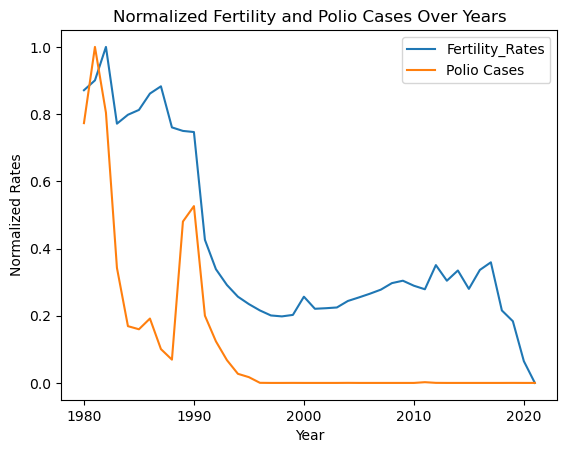

In [423]:
chn_fr_po = functions.ext_sel_da(fr_data, 'CHN', 1980, 2021)
chn_fr_po = {int(year): rate for year, rate in chn_fr_po.items()}
df = pd.DataFrame({'Fertility_Rates': chn_fr_po, 'Polio Cases': chn_polio_dict})
df_normalized = (df - df.min()) / (df.max() - df.min())
df_normalized.plot()
plt.title('Normalized Fertility and Polio Cases Over Years')
plt.xlabel('Year')
plt.ylabel('Normalized Rates')
plt.show()

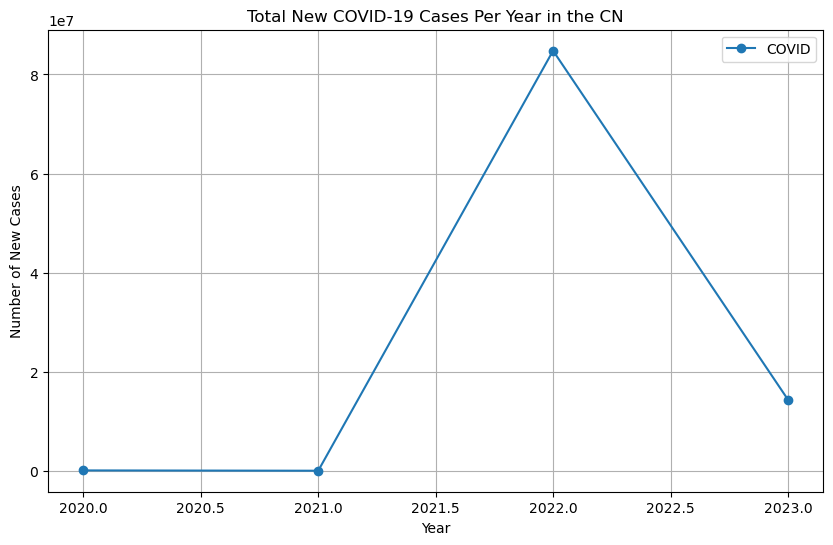

In [424]:
cn_covid = functions.ext_sel_covid(covid_data, 'CN')
plt.figure(figsize=(10, 6))
plt.plot(cn_covid, label = 'COVID', marker='o')
plt.title('Total New COVID-19 Cases Per Year in the CN')
plt.xlabel('Year')
plt.ylabel('Number of New Cases')
plt.grid(True)
plt.legend()
plt.show()

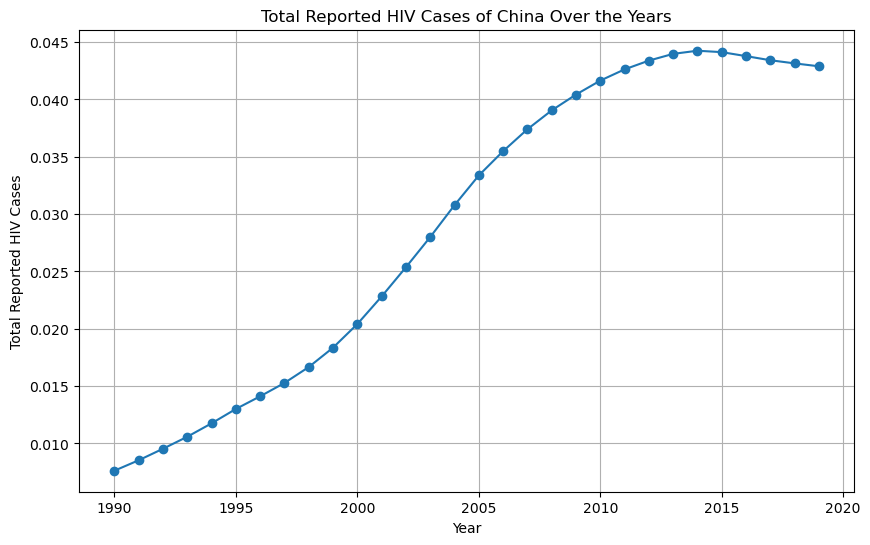

In [425]:
chn_hiv = functions.ext_sel_hiv(hiv_data, 'CHN')
plt.figure(figsize=(10, 6))
plt.plot(chn_hiv['Year'].values, chn_hiv['Current number of cases of hiv/aids per 100 people, in both sexes aged 15-49 years'].values, marker='o')
plt.title('Total Reported HIV Cases of China Over the Years')
plt.xlabel('Year')
plt.ylabel('Total Reported HIV Cases')
plt.grid(True)
plt.show()

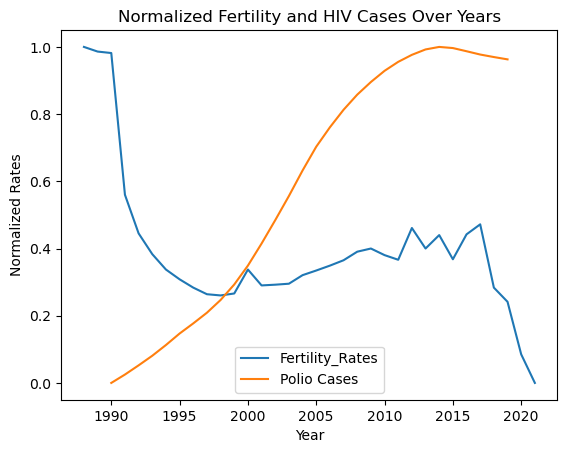

In [426]:
chn_hiv_dict = chn_hiv.set_index('Year')['Current number of cases of hiv/aids per 100 people, in both sexes aged 15-49 years'].to_dict()
chn_fr_hiv = functions.ext_sel_da(fr_data, 'CHN', 1988, 2021)
chn_fr_hiv = {int(year): rate for year, rate in chn_fr_hiv.items()}
df = pd.DataFrame({'Fertility_Rates': chn_fr_hiv, 'Polio Cases': chn_hiv_dict})
df_normalized = (df - df.min()) / (df.max() - df.min())
df_normalized.plot()
plt.title('Normalized Fertility and HIV Cases Over Years')
plt.xlabel('Year')
plt.ylabel('Normalized Rates')
plt.show()

USA

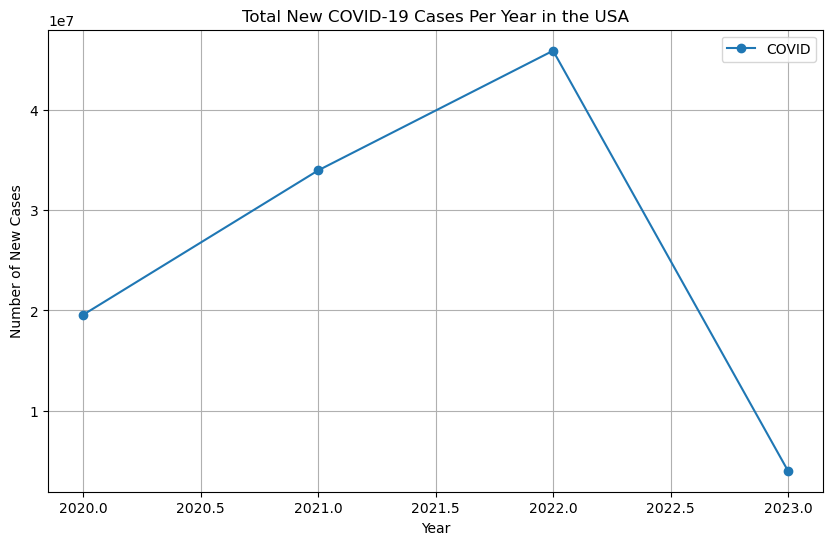

In [427]:
usa_covid = functions.ext_sel_covid(covid_data, 'US')
plt.figure(figsize=(10, 6))
plt.plot(usa_covid, label = 'COVID', marker='o')
plt.title('Total New COVID-19 Cases Per Year in the USA')
plt.xlabel('Year')
plt.ylabel('Number of New Cases')
plt.grid(True)
plt.legend()
plt.show()

Hypothesis two

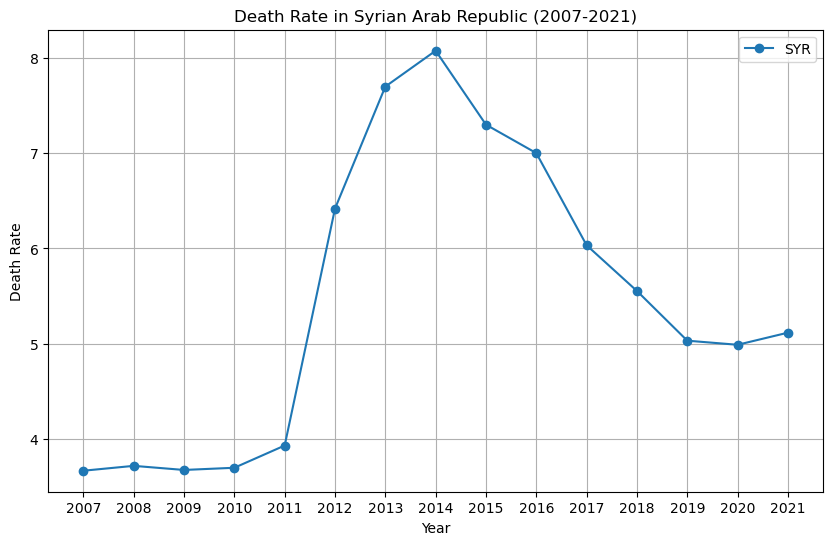

In [428]:
syrian_dt = functions.ext_sel_da(dr_data, 'SYR', 2007, 2021)
functions.plot_dt_draw(syrian_dt, 'SYR', 'Syrian Arab Republic', 1)

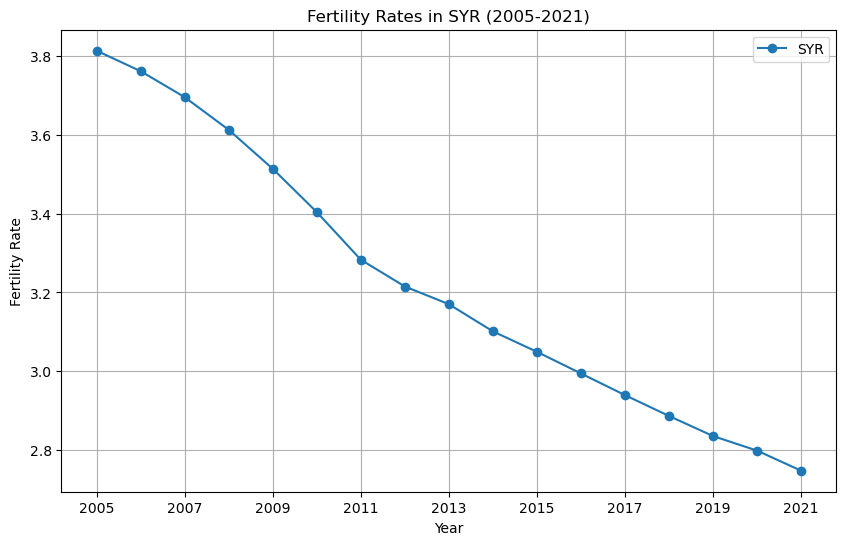

In [429]:
syr_fr = functions.ext_sel_da(fr_data, 'SYR', 2005, 2021)
functions.plot_fertility_rates(syr_fr, 'SYR', 2005, 2021, 2)

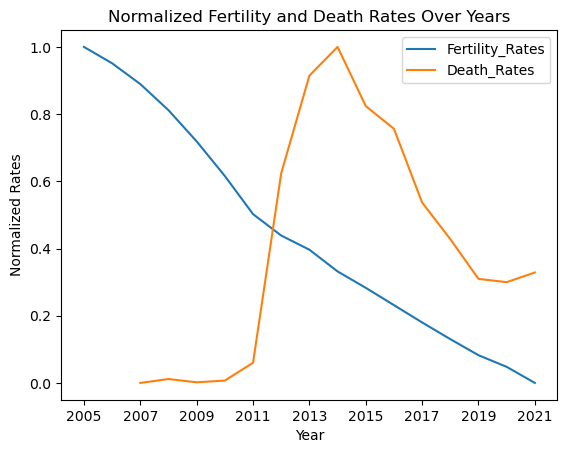

In [430]:
functions.plot_normalized_rates(syr_fr, syrian_dt)

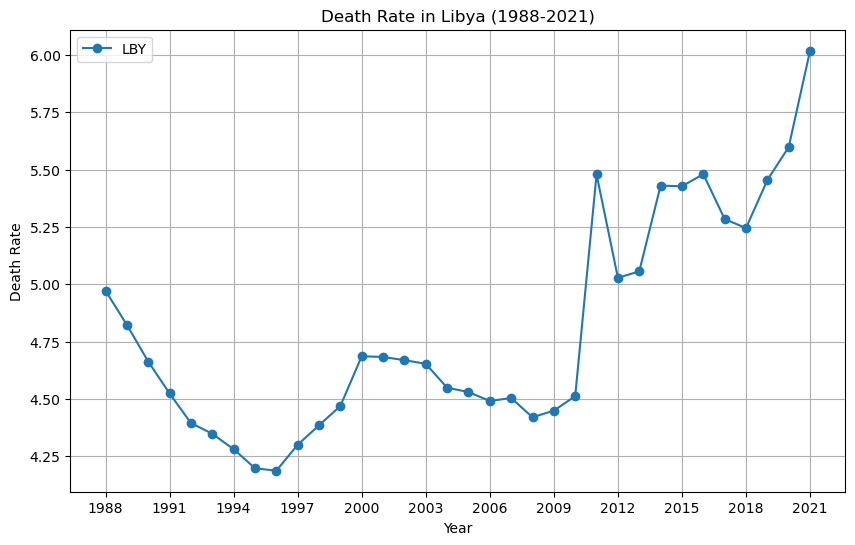

In [431]:
libya_dt = functions.ext_sel_da(dr_data, 'LBY', 1988, 2021)
functions.plot_dt_draw(libya_dt, 'LBY', 'Libya', 3)

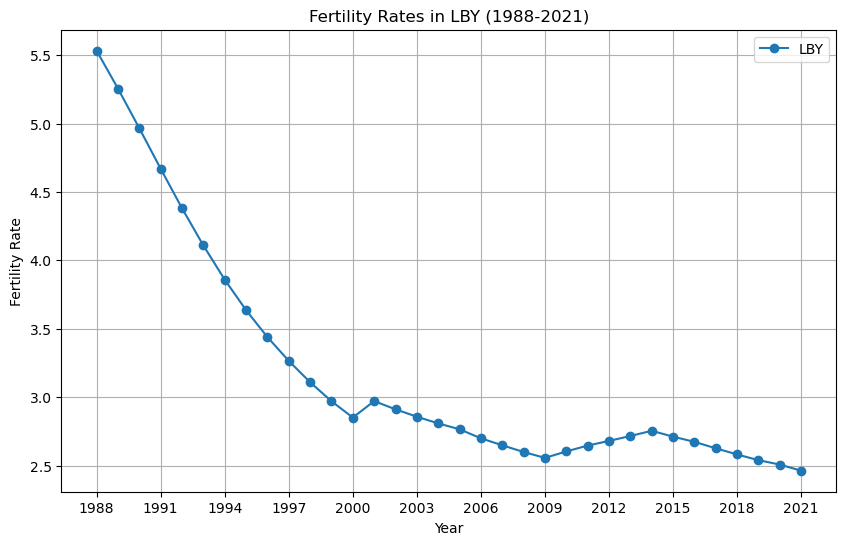

In [432]:
lby_fr = functions.ext_sel_da(fr_data, 'LBY', 1988, 2021)
functions.plot_fertility_rates(lby_fr, 'LBY', 1988, 2021, 3)

Normalized

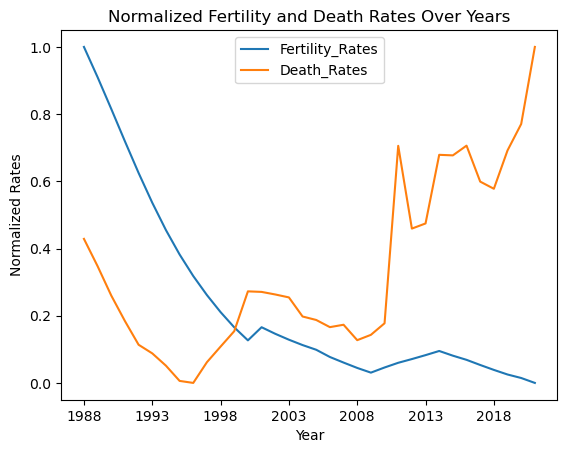

In [433]:
functions.plot_normalized_rates(lby_fr, libya_dt)

Number of documented civilian deaths in the Iraq war from 2003 to October 2023

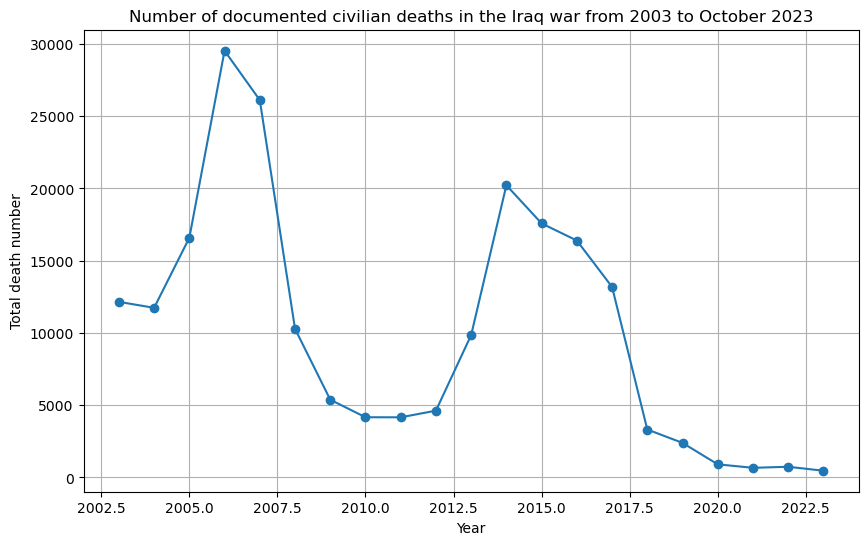

In [434]:
iraq_death_ct = iraq_death[['Year', 'Death number']]
#print(iraq_death_ct)
plt.figure(figsize=(10, 6))
plt.plot(iraq_death_ct['Year'].values, iraq_death_ct['Death number'].values, marker='o')
plt.title('Number of documented civilian deaths in the Iraq war from 2003 to October 2023')
plt.xlabel('Year')
plt.ylabel('Total death number')
plt.grid(True)
plt.show()

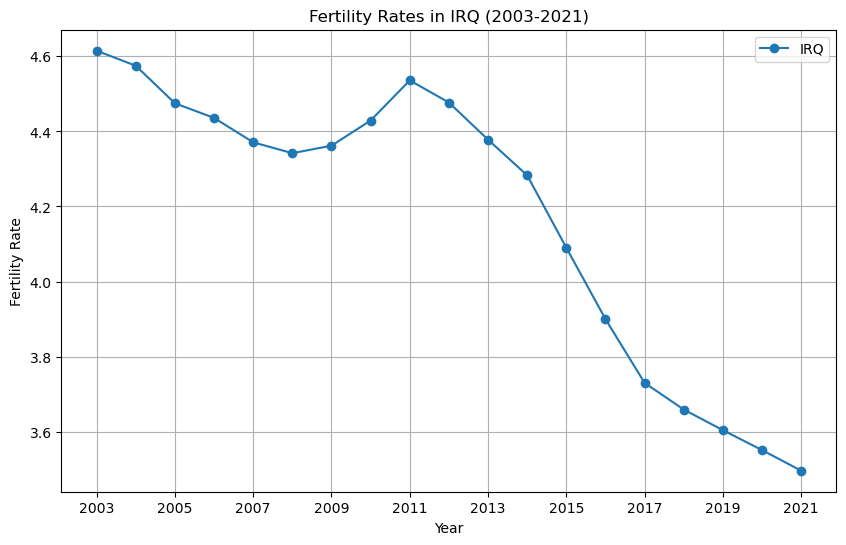

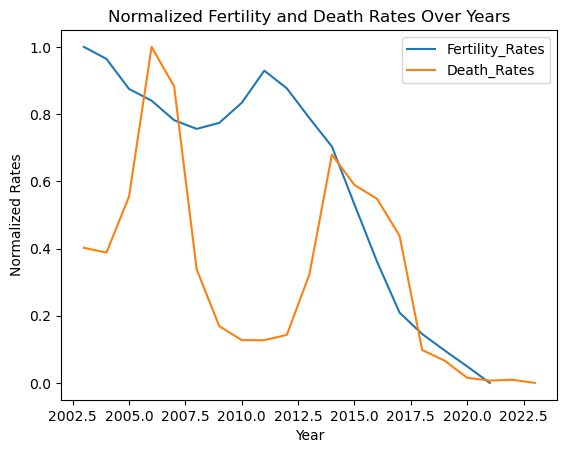

In [435]:
iraq_dt_dict = iraq_death_ct.set_index('Year')['Death number'].to_dict()
iraq_fr = functions.ext_sel_da(fr_data, 'IRQ', 2003, 2021)
functions.plot_fertility_rates(iraq_fr, 'IRQ', 2003, 2021, 2)
iraq_fr_int_keys = {int(year): rate for year, rate in iraq_fr.items()}
functions.plot_normalized_rates(iraq_fr_int_keys, iraq_dt_dict)

Battle-related deaths (number of people) - Afghanistan

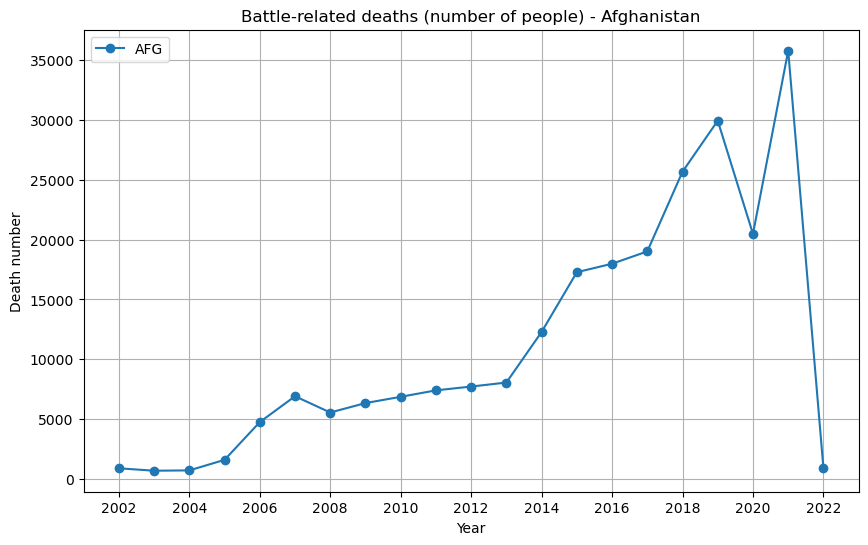

In [436]:
afg_dt = functions.ext_sel_da(bt_death, 'AFG', 2002, 2022)
afg_years = list(map(int, afg_dt.keys()))
afg_rates = list(afg_dt.values())
plt.figure(figsize=(10, 6))
plt.plot(afg_years, afg_rates, label='AFG', marker='o')
plt.xticks(range(min(afg_years), max(afg_years) + 1, 2))
plt.title("Battle-related deaths (number of people) - Afghanistan")
plt.xlabel("Year")
plt.ylabel("Death number")
plt.grid(True)
plt.legend()
plt.show()

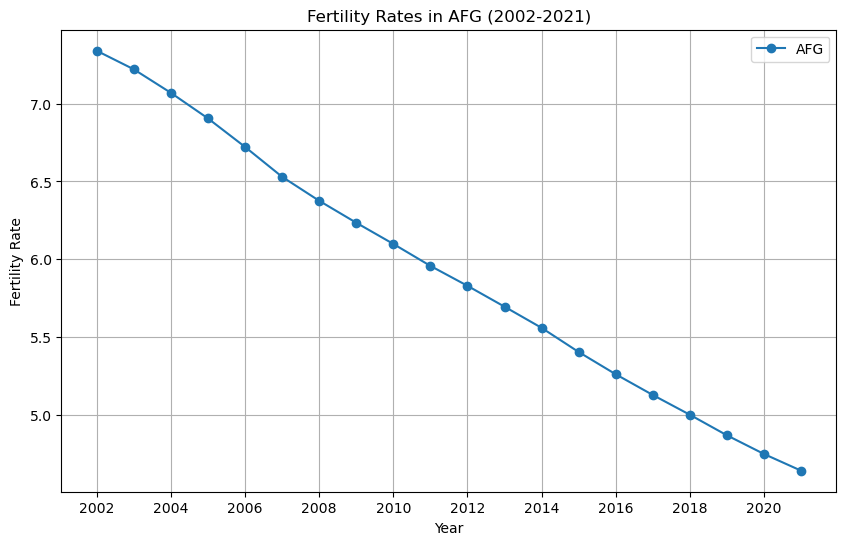

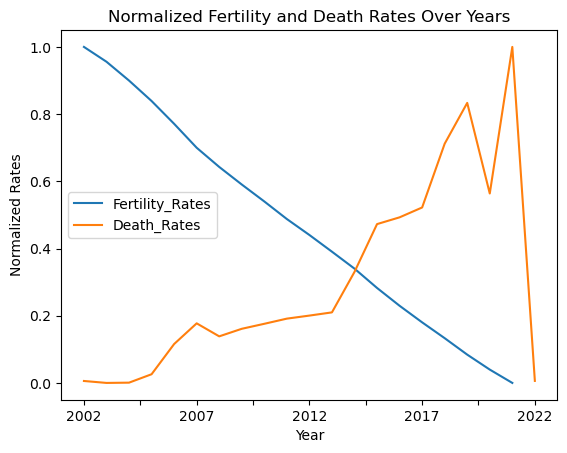

In [437]:
afg_fr = functions.ext_sel_da(fr_data, 'AFG', 2002, 2021)
functions.plot_fertility_rates(afg_fr, 'AFG', 2002, 2021, 2)
functions.plot_normalized_rates(afg_fr, afg_dt)